Importing libiraires

In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# to ignore warnings
import warnings
warnings.filterwarnings('ignore')

Getting the data


In [120]:
train_data = pd.read_csv("/content/train.csv")
test_data = pd.read_csv("/content/test.csv")

top 5 data

In [121]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Last 5 data

In [122]:
train_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [123]:
train_data.shape

(891, 12)

In [124]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [125]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [126]:
train_data.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

Getting test data

In [127]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


One Column is missing which is Survived, as this one we have to predict.

In [128]:
test_data.shape

(418, 11)

## Data Cleaning

In [129]:
# check for duplicates
print(train_data.duplicated().sum())
print(test_data.duplicated().sum())

0
0


NO Duplicated values are present.


Now checking for the null values.

In [130]:
# check for null values
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

There are 177 in Age, 687 in Cabin and 2 in Embarked null values.

In [131]:
# check for null values
test_data.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [132]:
test_data['Fare'].fillna(test_data['Fare'].median(), inplace=True)

In [133]:
test_data.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [134]:
train_data["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [135]:
#Fill null values in Embarked with most common value 'S'
train_data["Embarked"].fillna("S", inplace= True)

train_data["Embarked"].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

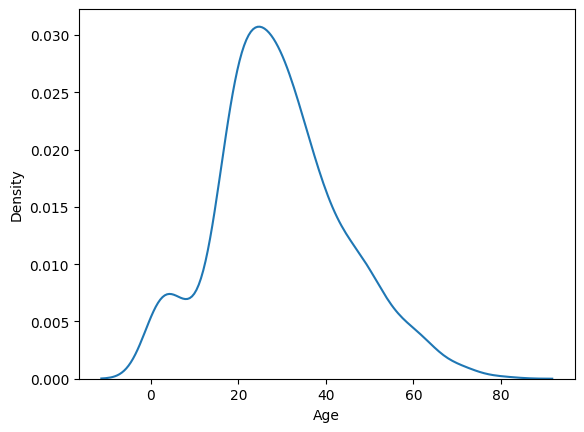

In [136]:
# show the distribution for Age 
sns.kdeplot(data=train_data, x="Age");

The age is slightly right skewed, so we will fill null values with median.

In [137]:
age_median = train_data["Age"].median()
train_data["Age"].fillna(age_median, inplace=True)

age_median2 = test_data["Age"].median()
test_data["Age"].fillna(age_median2, inplace=True)

In [138]:
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [139]:
train_data["Cabin"].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [140]:
# Fill missing values in Cabin with "N/A"
train_data['Cabin'] = train_data['Cabin'].fillna('N/A')
test_data['Cabin'] = test_data['Cabin'].fillna('N/A')

Draw a boxplot for Age column

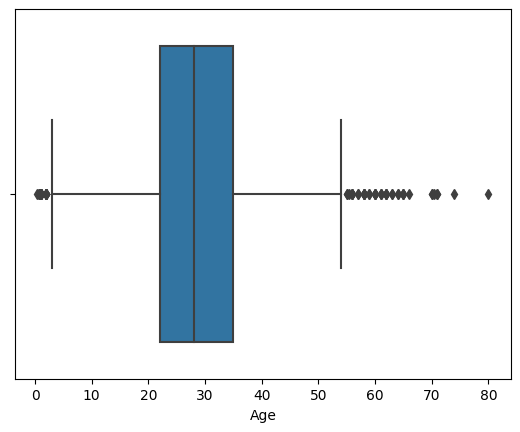

In [141]:

sns.boxplot(data=train_data,x="Age");

We have some outliers, but I prefer not to remove them. I think they provide significant info.

In [142]:
train_data["SibSp"].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [143]:
train_data["Parch"].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [144]:
train_data["Ticket"].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

In [145]:
test_data["Age"].max()

76.0

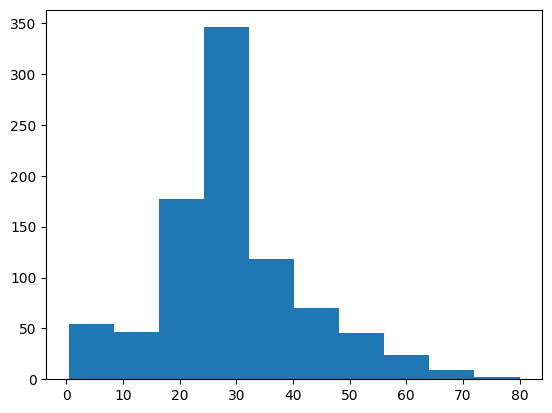

In [146]:
plt.hist(train_data["Age"]);

In [147]:
# create AgeGroup column
bins = [0, 12, 18, 30, 50, 100]
labels = ['Child', 'Teenager', 'Young Adult', 'Adult', 'Senior']
train_data['AgeGroup'] = pd.cut(train_data['Age'], bins=bins, labels=labels)
test_data["AgeGroup"] = pd.cut(test_data["Age"], bins=bins, labels = labels)

In [148]:
train_data["AgeGroup"].value_counts()

Young Adult    447
Adult          241
Teenager        70
Child           69
Senior          64
Name: AgeGroup, dtype: int64

In [149]:
# create title column 
train_data["Title"] = [name.split(',')[1].split('.')[0].strip() for name in train_data['Name']]
test_data["Title"] = [name.split(',')[1].split('.')[0].strip() for name in test_data['Name']]

In [150]:
train_data["Title"].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: Title, dtype: int64

In [151]:
test_data["Title"].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64

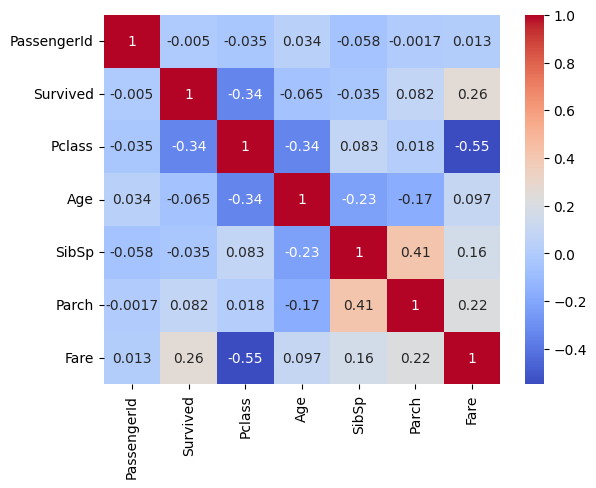

In [152]:
# Create a correlation matrix
corr = train_data.corr()

# Create a heatmap using seaborn
sns.heatmap(corr, cmap="coolwarm", annot=True);

In [153]:
# Count the number of survivors
num_survivors = train_data["Survived"].sum()

# Calculate the overall survival rate
total_passengers = len(train_data)
survival_rate = (num_survivors / total_passengers) * 100

print("The overall survival rate was: {:.2f}%".format(survival_rate))

The overall survival rate was: 38.38%


Does passenger class affect survival rates?

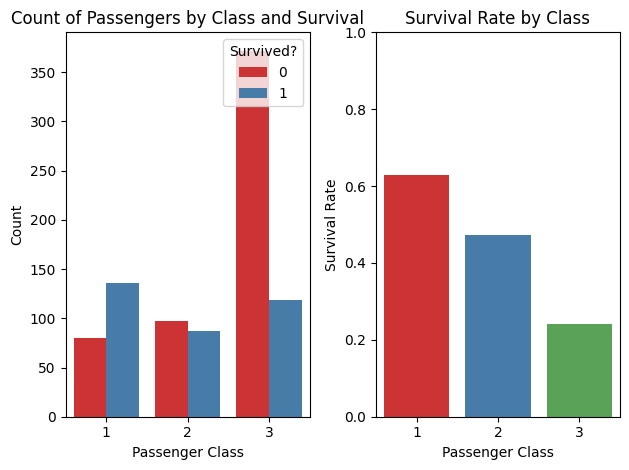

In [154]:
# Count plot
plt.subplot(1, 2, 1) # 1 row, 2 columns, first plot
sns.countplot(x='Pclass', hue='Survived', data=train_data, palette='Set1')
plt.title('Count of Passengers by Class and Survival')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(title='Survived?', loc='upper right')

# Bar plot
plt.subplot(1, 2, 2) # 1 row, 2 columns, second plot
survival_rate_by_class = train_data.groupby('Pclass')['Survived'].mean().reset_index()
sns.barplot(x='Pclass', y='Survived', data=survival_rate_by_class, palette='Set1')
plt.title('Survival Rate by Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.ylim(0, 1) # Set y-axis limit from 0 to 1

plt.tight_layout() # Adjust the layout of the plots
plt.show()

Passengers in 1st class are more likely to survive.
Passengers in 3d class are more likely to die.

How does the survival rate differ by gender

<Axes: xlabel='Sex', ylabel='Survived'>

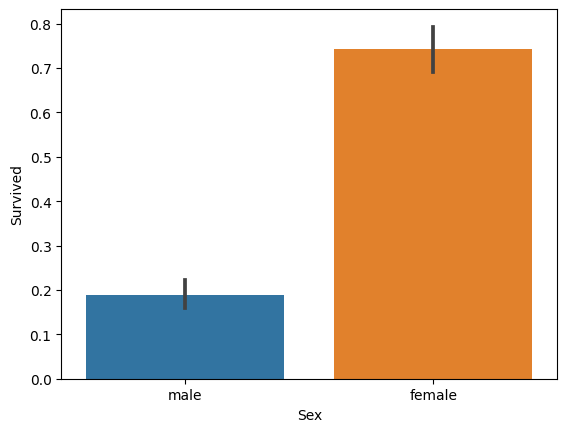

In [155]:
sns.barplot(train_data, x = 'Sex', y = 'Survived')

Women have a greater chance of survival than men here.

Were children more likely to survive compared to adults?

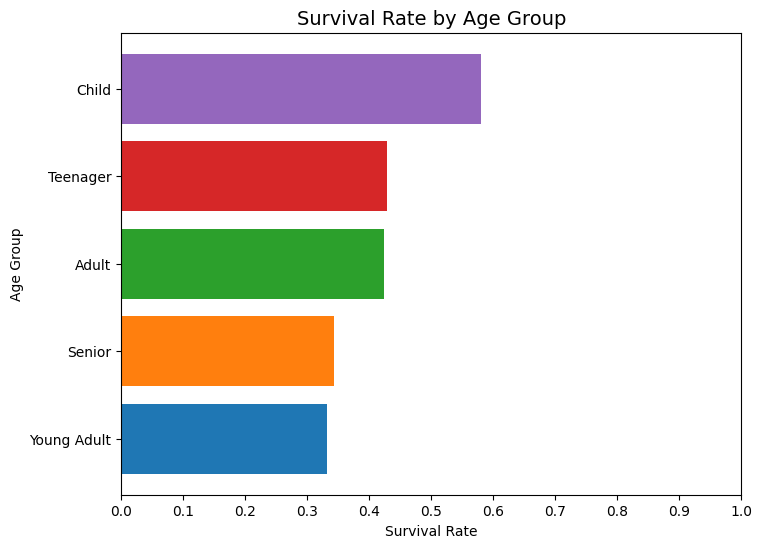

In [156]:
agegroup_survival_rate = train_data.groupby('AgeGroup')['Survived'].mean().sort_values()

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']

plt.figure(figsize=(8,6))
plt.barh(agegroup_survival_rate.index, agegroup_survival_rate.values, color = colors)
plt.title('Survival Rate by Age Group', fontsize=14)
plt.xlabel('Survival Rate')
plt.ylabel('Age Group')
plt.xticks(np.arange(0, 1.1, 0.1))
plt.show()

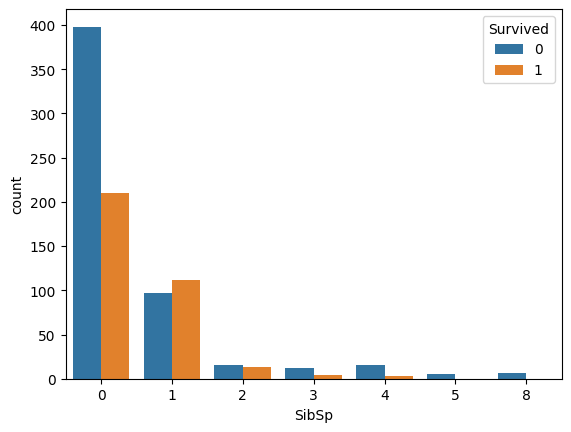

In [157]:
sns.countplot(x="SibSp", hue="Survived", data=train_data)
plt.show()

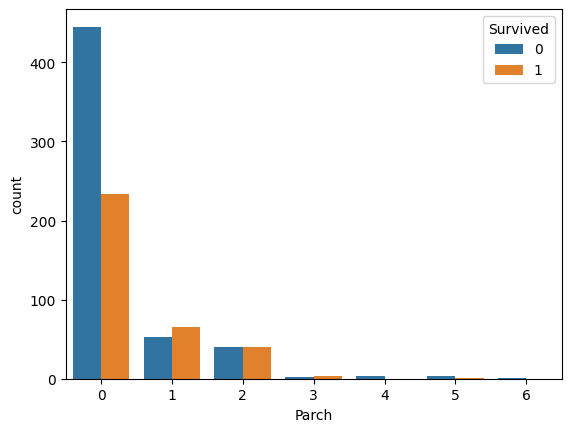

In [158]:
sns.countplot(x="Parch", hue="Survived", data=train_data)
plt.show()

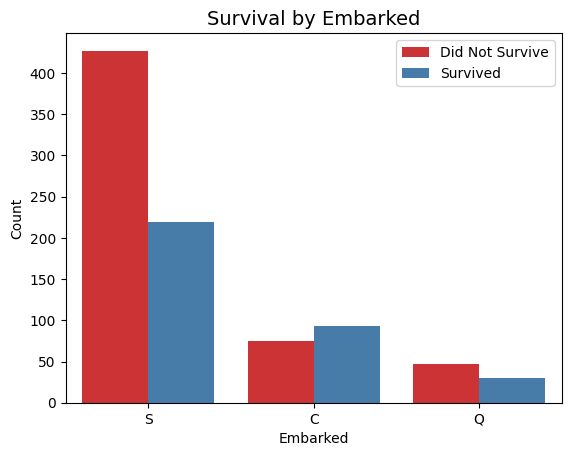

In [159]:
sns.countplot(x='Embarked', hue='Survived', data=train_data, palette='Set1')

plt.title('Survival by Embarked', fontsize=14)
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(['Did Not Survive', 'Survived'], loc='upper right')
plt.show()

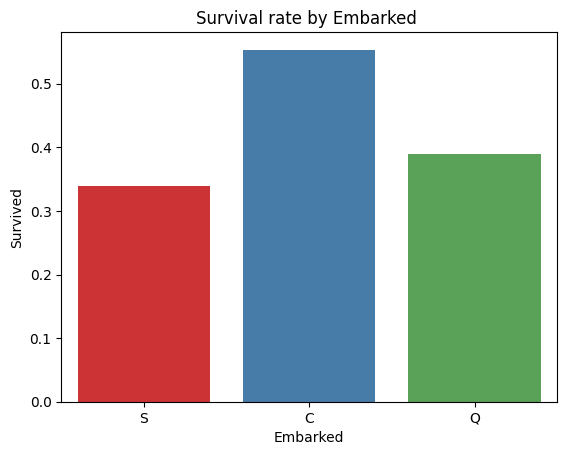

In [160]:
sns.barplot(x='Embarked', y='Survived', data=train_data, ci=None, palette='Set1');
plt.title("Survival rate by Embarked ")
plt.show()

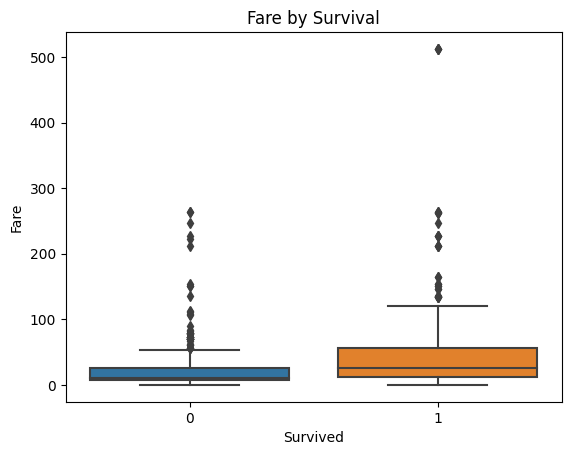

In [161]:
sns.boxplot(x='Survived', y='Fare', data=train_data)
plt.title('Fare by Survival')
plt.xlabel('Survived')
plt.ylabel('Fare')
plt.show()

In [162]:
Passenger_Id  = test_data["PassengerId"]

Survived passengers paid more.

In [163]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [164]:
# Define the features and target variable
features = ["Pclass","Sex","Fare","Embarked","AgeGroup","SibSp","Parch","PassengerId"]
target = "Survived"

In [165]:
# Split the data into train, validation, and test sets
X_train, X_val_test, y_train, y_val_test = train_test_split(train_data[features], train_data[target], test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=42)

In [166]:
# Prepare the training data
X_train = pd.get_dummies(X_train)
X_val = pd.get_dummies(X_val)
test_data = pd.get_dummies(test_data[features])

# Align columns in training and test data
X_train, test_data = X_train.align(test_data, join='outer', axis=1, fill_value=0)
X_val, test_data = X_val.align(test_data, join='outer', axis=1, fill_value=0)

# Scale numerical columns
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
num_cols = ["Fare","SibSp","Parch"]
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_val[num_cols] = scaler.transform(X_val[num_cols])
test_data[num_cols] = scaler.transform(test_data[num_cols])

In [167]:
# Random Forest Classifier
rfc_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rfc_model.fit(X_train, y_train)

# Make predictions on validation data
y_pred_val = rfc_model.predict(X_val)

# Evaluate model on validation data
acc_val = round(accuracy_score(y_val, y_pred_val) * 100, 2)
print("Random Forest Classifier accuracy on validation data:", acc_val)
print("Random Forest Classifier confusion matrix on validation data:")
print(confusion_matrix(y_val, y_pred_val))
print("Random Forest Classifier classification report on validation data:")
print(classification_report(y_val, y_pred_val))

# Make predictions on test data using the trained model
y_pred_rfc = rfc_model.predict(test_data)

Random Forest Classifier accuracy on validation data: 82.02
Random Forest Classifier confusion matrix on validation data:
[[103  10]
 [ 22  43]]
Random Forest Classifier classification report on validation data:
              precision    recall  f1-score   support

           0       0.82      0.91      0.87       113
           1       0.81      0.66      0.73        65

    accuracy                           0.82       178
   macro avg       0.82      0.79      0.80       178
weighted avg       0.82      0.82      0.82       178



In [168]:
test_data.head()

,Pclass,Fare,SibSp,Parch,PassengerId,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,AgeGroup_Child,AgeGroup_Teenager,AgeGroup_Young Adult,AgeGroup_Adult,AgeGroup_Senior
0,3,0.015282,0.000,0.0,892,0,1,0,1,0,0,0,0,1,0
1,3,0.013663,0.125,0.0,893,1,0,0,0,1,0,0,0,1,0
2,2,0.018909,0.000,0.0,894,0,1,0,1,0,0,0,0,0,1
3,3,0.016908,0.000,0.0,895,0,1,0,0,1,0,0,1,0,0
4,3,0.023984,0.125,0.2,896,1,0,0,0,1,0,0,1,0,0


In [170]:
# Create submission file
submission = pd.DataFrame({
    "PassengerId":test_data.PassengerId ,
    "Survived": y_pred_rfc
})
submission.to_csv("submission.csv", index=False)